<a href="https://colab.research.google.com/github/vishalveerareddy/NLP-Project/blob/main/NLPProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install sentence_transformers

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 59 kB 6.0 MB/s 
     |████████████████████████████████| 3.3 MB 17.0 MB/s 
     |████████████████████████████████| 895 kB 40.5 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 78 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 11.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=2ff56ddef910d695c6f9d12e1c0c1a36374314bc01318a01f6b4251870fc430e
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


#BERT Model

In [ ]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def answer_question(question, answer_text):
    input_ids = tokenizer.encode(question, answer_text)
    sep_index = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_index + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    assert len(segment_ids) == len(input_ids)
    outputs = model(torch.tensor([input_ids]), 
                    token_type_ids=torch.tensor([segment_ids]),
                    return_dict=True) 

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer = tokens[answer_start]
    for i in range(answer_start + 1, answer_end + 1):
      if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
      else:
        answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

In [ ]:
import textwrap

wrapper = textwrap.TextWrapper(width=80) 

bert_abstract = "We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement)."

bert_abstract

'We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement)

In [ ]:
question = "What does the 'B' in BERT stand for?"

answer_question(question, bert_abstract)

Answer: "bidirectional encoder representations from transformers"


In [ ]:
question = "Is BERT simple?"

answer_question(question, bert_abstract)

Answer: "conceptually simple and empirically powerful"


In [2]:
# Baseline
#utility function for BERT word embeddings
def bert_vectorize(sentences):
    #load pretrained BERT model
    model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')
    #encode sentences
    vectors = model.encode(sentences)
    return list(vectors)

In [3]:
vectorized_sq_pairs = bert_vectorize(sq_pairs)

NameError: ignored

#Preprocessing Data

In [4]:
import pickle
import numpy as np



In [5]:
with open('train_qa.txt','rb') as f:
    train_data=pickle.load(f)
with open("test_qa.txt",'rb') as f:
  test_data = pickle.load(f)

In [6]:
data = train_data + test_data




In [8]:
from sentence_transformers import SentenceTransformer

ValueError: ignored

In [26]:
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from sklearn.preprocessing import MinMaxScaler
class EmbeddingVectorizer(object):
    def __init__(self, word2vec):
          self.word2vec = word2vec
          self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
            return self
    def transform(self, X):
            return np.array([
                np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ])
def w2v(X_train, X_test):
  model = gensim.models.Word2Vec([doc for i, doc in enumerate(X_train+X_test)], min_count = 1, 
                              size = 100, window = 5)

  scaler = MinMaxScaler()


  d2v = dict(zip(model.wv.index2word, model.wv.syn0)) 
  modelw = EmbeddingVectorizer(d2v)
  # converting text to numerical data using Word2Vec 
  X_train_vectors_w2v = modelw.transform(X_train)
  X_train_vec = scaler.fit_transform(X_train_vectors_w2v)#Used for normalising the vector

  X_test_vectors_w2v = modelw.transform(X_test)
  X_test_vec = scaler.fit_transform(X_test_vectors_w2v)#Used for normalising the vector
  return [X_train_vec,X_test_vec]

  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
train_story_text=[]
train_question_text=[]
train_answers=[]

In [10]:
for story,question,answer in data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)


In [12]:
sq_pairs = [str(train_story_text[i])+" "+str(train_question_text[i]) for i in range(len(train_story_text))]

In [15]:
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
word = []
for statement in sq_pairs:
  stop = set(stopwords.words('english') + list(string.punctuation))
  st = word_tokenize(statement)
  lemmatizer = WordNetLemmatizer()
  finalStats =[]
  for x in st:
    if x not in stop:
      finalStats.append(lemmatizer.lemmatize(x))
  word.append(finalStats)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Baseline Features

In [19]:
word[0:5]

[["'Mary",
  "'moved",
  "'to",
  "'the",
  "'bathroom",
  "'Sandra",
  "'journeyed",
  "'to",
  "'the",
  "'bedroom",
  "'Is",
  "'Sandra",
  "'in",
  "'the",
  "'hallway"],
 ["'Mary",
  "'moved",
  "'to",
  "'the",
  "'bathroom",
  "'Sandra",
  "'journeyed",
  "'to",
  "'the",
  "'bedroom",
  "'Mary",
  "'went",
  "'back",
  "'to",
  "'the",
  "'bedroom",
  "'Daniel",
  "'went",
  "'back",
  "'to",
  "'the",
  "'hallway",
  "'Is",
  "'Daniel",
  "'in",
  "'the",
  "'bathroom"],
 ["'Mary",
  "'moved",
  "'to",
  "'the",
  "'bathroom",
  "'Sandra",
  "'journeyed",
  "'to",
  "'the",
  "'bedroom",
  "'Mary",
  "'went",
  "'back",
  "'to",
  "'the",
  "'bedroom",
  "'Daniel",
  "'went",
  "'back",
  "'to",
  "'the",
  "'hallway",
  "'Sandra",
  "'went",
  "'to",
  "'the",
  "'kitchen",
  "'Daniel",
  "'went",
  "'back",
  "'to",
  "'the",
  "'bathroom",
  "'Is",
  "'Daniel",
  "'in",
  "'the",
  "'office"],
 ["'Mary",
  "'moved",
  "'to",
  "'the",
  "'bathroom",
  "'Sandra",
  "'journey

In [20]:
from sklearn.model_selection import train_test_split
X= word
y=train_answers



In [21]:
from sklearn import preprocessing

In [22]:
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [27]:
X_train,X_test = w2v(X_train=X_train,X_test= X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [28]:
#classify response type
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
svmmodel = SVC(kernel='sigmoid', gamma="auto", C=10, decision_function_shape='ovo')
clf = make_pipeline(StandardScaler(), svmmodel)
clf.fit(X_train, le.transform(y_train))
predictions = svmmodel.predict(X_test)
accuracy = svmmodel.score(X_test, le.transform(y_test))
f1score = f1_score(le.transform(y_test), predictions, average='micro')
print(classification_report(le.transform(y_test), predictions))


              precision    recall  f1-score   support

           0       0.51      0.82      0.63      1812
           1       0.53      0.20      0.29      1818

    accuracy                           0.51      3630
   macro avg       0.52      0.51      0.46      3630
weighted avg       0.52      0.51      0.46      3630



In [34]:
import seaborn as sns
import pandas as pd


In [42]:

from yellowbrick.classifier import ClassificationReport
# Specify the target classes
classes = ["no", "yes"]
clf_report=classification_report(le.transform(y_test), predictions)
visualizer = ClassificationReport(svmmodel,classes=classes, support=True)

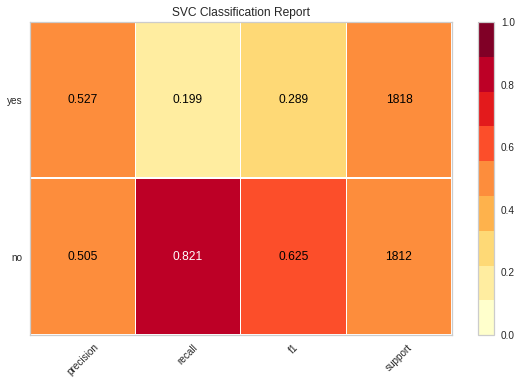

In [43]:
visualizer.fit(X_train, le.transform(y_train))        # Fit the visualizer and the model
visualizer.score(X_test, le.transform(y_test))        # Evaluate the model on the test data
visualizer.show() 

#Test Code


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(min_samples_leaf=8, n_estimators=60)
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X_train, le.transform(y_train))
predictions = clf.predict(X_test)
accuracy = clf.score(X_test, le.transform(y_test))
accuracy

0.5057851239669422

In [ ]:
model = xgb.XGBClassifier()
param_dist = {"max_depth": [3,5,10],
              "min_child_weight" : [1,5,10],
              "learning_rate": [0.07, 0.1,0.2],
               }

# run randomized search
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=5, n_jobs=-1)
grid_search.fit(X_train, le.transform(y_train))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 5, 10]},
           

In [ ]:


predictions = grid_search.predict(X_test)
accuracy = grid_search.score(X_test, le.transform(y_test))
accuracy

0.509641873278237

#End to End Memory Model

In [ ]:
vocab =set()
for story,question,answer in data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [ ]:
vocab.add('no')
vocab.add('yes')

In [ ]:
vocab_len=len(vocab)+1


In [ ]:

#Longest story

all_story_lens=[len(x[0]) for x in data]
max_story_len=max(all_story_lens)

In [ ]:
#Longest question
all_question_lens=[len(x[1]) for x in data]
max_question_len=max(all_question_lens)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
train_story_seq =tokenizer.texts_to_sequences(train_story_text)


In [ ]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    X=[]
    #Questions=Xq
    Xq=[]
    #Y Correct answer(yes/no)
    Y=[]
    
    for story,query,answer in data:
        x=[word_index[word.lower()] for word  in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [ ]:
inputs_train , queries_train , answers_train =vectorize_stories(train_data)


In [ ]:
inputs_test , queries_test , answers_test =vectorize_stories(test_data)


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop

In [ ]:

input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
embedding_dim = 128
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim= embedding_dim))
input_encoder_m.add(Dropout(0.3))
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,
                               output_dim=embedding_dim,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))


In [ ]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [ ]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)

In [ ]:
answer = concatenate([response, question_encoded])

In [ ]:
answer = LSTM(32)(answer)

In [ ]:

answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [ ]:
answer = Activation('softmax')(answer)

model = Model([input_sequence, question], answer)
optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import math
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

initial_learning_rate = 0.01
epochs = 120
decay = initial_learning_rate / epochs

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 20
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

learning_rate = LearningRateScheduler(lr_step_decay, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.66, patience=5, min_lr=0.0001, verbose=1)

In [ ]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=256,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
40/40 [==============================] - 9s 35ms/step - loss: 0.9603 - accuracy: 0.4804 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 2/120
40/40 [==============================] - 1s 16ms/step - loss: 0.7322 - accuracy: 0.4982 - val_loss: 0.7225 - val_accuracy: 0.4970
Epoch 3/120
40/40 [==============================] - 1s 16ms/step - loss: 0.7145 - accuracy: 0.4908 - val_loss: 0.7161 - val_accuracy: 0.4970
Epoch 4/120
40/40 [==============================] - 1s 15ms/step - loss: 0.7109 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 5/120
40/40 [==============================] - 1s 15ms/step - loss: 0.7051 - accuracy: 0.5018 - val_loss: 0.7245 - val_accuracy: 0.5030
Epoch 6/120
40/40 [==============================] - 1s 16ms/step - loss: 0.7050 - accuracy: 0.4952 - val_loss: 0.7323 - val_accuracy: 0.4970
Epoch 7/120
40/40 [==============================] - 1s 15ms/step - loss: 0.7017 - accuracy: 0.4986 - val_loss: 0.7132 - val_accuracy: 0.5030
Epoch 

In [ ]:
filename = 'chatbot_120_epochs_9710.h5'
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
pred_results = model.predict(([inputs_test, queries_test]))


In [ ]:
story =' '.join(word for word in test_data[0][0])


In [ ]:
query = ' '.join(word for word in test_data[0][1])


In [ ]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)

Predicted answer is:  no


In [ ]:
history.history['accuracy'][-1]

0.963699996471405